In [ ]:
import piplite
await piplite.install("ipywidgets")

# Stable local dynamics for day-to-day departure time choice: A companion Jupyter Notebook of numerical experiments

## 1. Introduction

This is a companion Jupyter Notebook for version 9 of the article entitled "Stable local dynamics for day-to-day departure time choice". In this notebook, the sections, equations, tables, and figures are numbered the same as those in the article. But we only present discrete versions of the equations in the article that are directly used in the numerical experiments.

The following the list of notations, copied from Table 1 in the article.
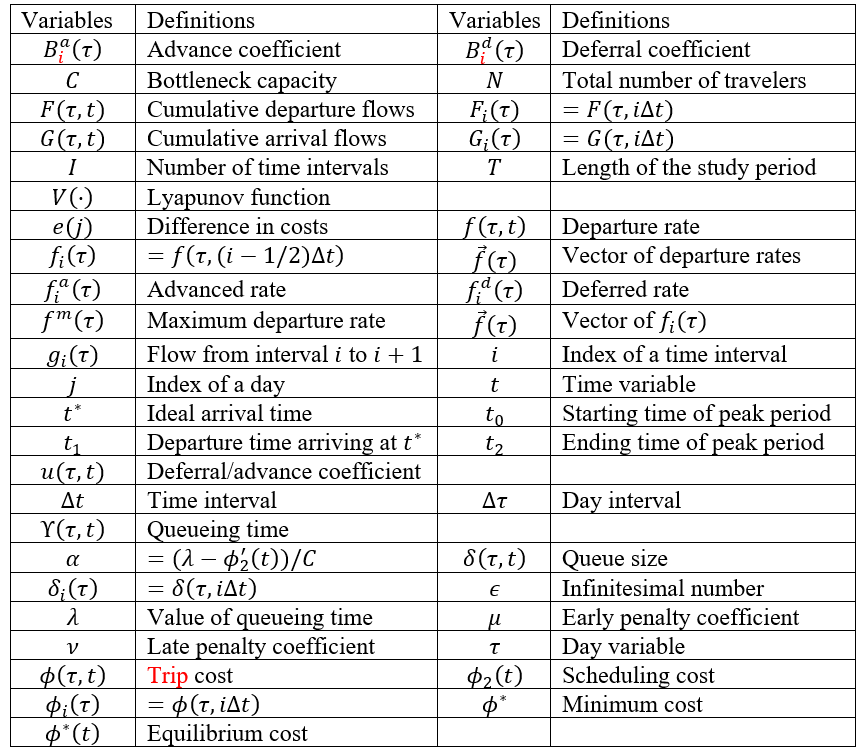

## 2. Point queue model and cost function

### 2.1 Point queue model

We divide the time period from $[0,T]$ into $I$ intervals with $\Delta t= \frac T I$. In the article, the indices of $f_i(\tau)$ are $i=1,\cdots, I$; but in the notebook, $i=0,\cdots,I-1$ to be consistent with Python's labeling convention. 

The initial condition: $\delta_0(\tau)=0.$
For $i=1,\cdots,I$, we update the queue length as follows:
$$δ_i (τ)=\{δ_{i-1} (τ)+(f_{i-1} (τ)-C) Δt  \}_+.  \quad (2') $$ 
Note that this equation is slightly different from equation (2) in the article, since the indices of $f_i$ is from $0$ to $I-1$ in the notebook. Thus we label this equation as (2').

The following Fig. 1(a) illustrates the variables for the point queue model.
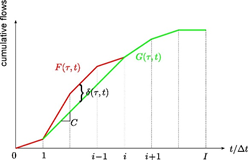

#### A1. delta=pointqueuemodel(f,I,C,dt): calculate the queue size

In [1]:
def pointqueuemodel(f,I,C,dt): 
    import numpy as np
    delta=np.zeros(I+1)
    for i in range(1,I+1):
        delta[i]=np.maximum(0,delta[i-1]+(f[i-1]-C)*dt) #Equation (2')
    return delta

### 2.2 Cost function

#### A2. I1=early_late_arrivals(I,dt,queuetime,tstar): $i=0,1,\cdots,I_1$ early arrivals

We denote the last departure time step with early arrivals by $I_1$; i.e., $iΔt+Υ_i (τ)≤t^*$ for $i=0,1,⋯,I_1$, and $iΔt+Υ_i (τ)>t^*$ for $i=I_1+1,⋯,I$. 

In [2]:
def early_late_arrivals(I,dt,queuetime,tstar):
    import numpy as np
    aa=np.linspace(0,I,I+1)*dt+queuetime
    bb=aa<=tstar
    I1=np.sum(bb)-1
    return I1

#### A3. al=alpha(I,I1,la,mu,nu,C): calculate alpha

$$\alpha(\tau,t)=(\lambda+\phi_2'(t+\Upsilon(\tau,t)))/C.$$

Thus, $α(τ,t)$ equals $α_1≡(λ-μ)/C$ for early arrivals, and $α_2≡(λ+ν)/C$ for late arrivals.

In [3]:
def alpha(I,I1,la,mu,nu,C):
    import numpy as np
    al=np.concatenate([np.ones(I1)*(la-mu)/C,np.ones(I-I1)*(la+nu)/C])
    return al

#### A4. [phi,omega]=costfunction_vec(delta,tstar,la,mu,nu,C,dt,I): calculate cost

The total cost function at $i\Delta t$ ($i=0,\cdots,I-1$) associated with $f_i(\tau)$ is given by:
$$ϕ_i (τ)=λ \cdot \Upsilon_i(\tau) +μ⋅\{ t^*-[(i+1)Δt+ \Upsilon_i(\tau)]\} _++ν⋅ \{(i+1)Δt+\Upsilon_i(\tau)-t^* \}_+, \quad (5')$$
where 
$\Upsilon_i(\tau)=\frac{δ_{i+1} (τ)} {C}. $

Note that (4') is slightly different from (4)  due to the different indices of $f_i(\tau)$.

The following Fig. 1(b) illustrates the variables for the cost function.
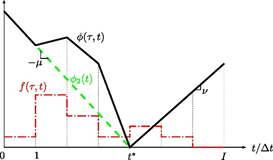

We denote the discrete value of $ω(τ,(i-1/2)Δt)$ by $ω_i (τ)$, which equals $$\omega_i(\tau)=\frac{\phi_i(\tau)-\phi_{i-1}(\tau)}{\Delta t}.$$

In [4]:
def costfunction_vec(delta,tstar,la,mu,nu,C,dt,I): #vectorized version
    import numpy as np
    phi=np.zeros(I+1)
    omega=np.zeros(I)
    queuetime=delta/C
    arrivaltime=np.linspace(0,I,I+1)*dt+queuetime
    phi=la*queuetime+mu*np.maximum(0,tstar-arrivaltime)+nu*np.maximum(0,arrivaltime-tstar) #Equation (5')
    omega=(phi[1:]-phi[:-1])/dt
    return phi,omega

## 3. A local dynamical system model and its properties

### 3.1 Local dynamics of day-to-day departure time choice

The deferred rate for $i=0,\cdots,I-2$:
$$f_i^d (τ_j) \Delta \tau_j=B_{i+1}^d (τ_j) \cdot \left\{-\omega_{i+1}(\tau_j)\right\}_+ \cdot f_i (τ_j) \Delta t, 	\quad		(7')$$
and $f_{I-1}^d(\tau_j)=0$.
The advanced rate for $i=1,\cdots,I-1$: 
$$f_i^a (τ_j)\Delta \tau_j=B_i^a (τ_j)  \cdot \left\{\omega_i(\tau_j)\right\}_+ \cdot [f_i (τ_j)\Delta t-f_i^d (τ_j)\Delta \tau_j],  \quad	(8')$$
and $f_0^a(\tau_j)=0$.
We can update the departure rates as for $i=1,\cdots,I-2$
$$f_i (τ_j+Δτ_j)\Delta t=f_i (τ_j)\Delta t-f_i^d (τ_j)\Delta \tau_j-f_i^a (τ_j)\Delta \tau_j+f_{i-1}^d (τ_j)\Delta \tau_j+f_{i+1}^a (τ_j)\Delta \tau_j. \quad		(9')$$
For $i=0$ and $i=I-1$, we have 
$$f_0(\tau_j+\Delta \tau_j)\Delta t=f_0(\tau_j) \Delta t-f_0^d(\tau_j) \Delta \tau_j+f_1^a(\tau_j)\Delta \tau_j, \quad (9'a)$$
$$f_{I-1}(\tau_j+\Delta \tau_j)\Delta t=f_{I-1}(\tau_j)\Delta t-f_{I-1}^a(\tau_j)\Delta \tau_j+f_{I-2}^d(\tau_j)\Delta \tau_j. \quad (9'b)$$

The day-to-day dynamics are illustrated in the following Fig. 2. 
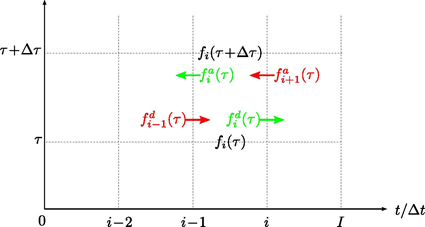

#### A5. [f,fd,fa]=originalmodel_onestep_vec(Bd,Ba,f,omega,I,dtau,dt,N): One step update of departure rates

In [5]:
def originalmodel_onestep_vec(Bd,Ba,f,omega,I,dtau,dt,N): #f indices: 0,1,...,I-1; 0 and I-1 always 0
    import numpy as np
    fd=np.zeros(I)
    fa=np.zeros(I)
    
    
    
    fd[:-1]=Bd[1:]*np.maximum(0,-omega[1:])*f[:-1]*dt/dtau #Equation (7')
    fa[1:]=Ba[1:]*np.maximum(0,omega[1:])*(f[1:]*dt/dtau-fd[1:]) #Equation (8')
    
    #print('omega:', omega[40:44], 'f:', f[40:44],'fd:',fd[40:44], 'Ba:', Ba[40:44]*omega[40:44], 'fa:', fa[40:44])
    
    
    f[0]=f[0]+(fa[1]-fd[0])*dtau/dt #Equation (9'a)
    f[I-1]=f[I-1]+(fd[I-2]-fa[I-1])*dtau/dt #Equation (9'b)
    f[1:-1]=f[1:-1]+(fd[:-2]+fa[2:]-fd[1:-1]-fa[1:-1])*dtau/dt #Equation (9)
    #print('f:',f[40:44])
    f=np.maximum(f,0) #To prevent negative rates caused by computational errors
    f=f*N/np.sum(f)/dt #To prevent violation of conservation caused by computational errors
    return f,fd,fa

### 3.2 Well-definedness condition

The deferral and advance coefficients are given by
$$B_i^d (τ)\leq \frac 1 {\lambda} \: \mbox{and} \:  B_i^a (τ)\leq \frac 1 {(λ+ν) \{\frac {f^m (τ)}C-1\}_+ +ν} . 	\quad		(14)$$

#### A6. [Bd,Ba]=constant_coefficients(f,omega,I,I1,dtau,dt,la,mu,nu,C)

We first set 
$$B_i^a (τ_j )=1/λ \quad and \quad B_i^d (τ_j )=0.1/\max⁡\{α_1 f_1^m (τ)-λ,α_2 f_2^m (τ)-λ,ν\},  \quad 	(34)$$
which are valid according to Theorem 3.4. 

Here $f_1^m (τ)$ is the maximum departure rate for early arrivals, and $f_2^m (τ)$ the maximum departure rate for late arrivals. They are defined in Theorem 2.3.


In [6]:
def constant_coefficients(f,omega,I,I1,dtau,dt,la,mu,nu,C): 
    import numpy as np    
    fm=np.amax(f)
    fm1=np.amax(f[:I1+1])
    fm2=np.amax(f[I1+1:])
    Bd1=np.ones(I)*1/(la) 
    aa=np.maximum(-mu+(la-mu)*np.maximum(0,fm1/C-1),nu+(la+nu)*np.maximum(0,fm2/C-1))
    
    Ba1=np.ones(I)*1/aa*0.1 #Equation (22)
        
    Bd=Bd1
    Ba=Ba1
    
    return Bd,Ba

## 4. Continuous version

### 4.2 Examples of symmetric deferral and advance coefficients
For $i=1,\cdots,I$,  $u_i(\tau_j)$ in (21) is calculated as
$$ u_i(\tau_j)=\min\{\frac C{3(\lambda+\nu)} \frac{\{3 \omega_i(\tau_j)+2\lambda \}_+   }{f_i(\tau_j)}, 1\}. \quad (21') $$

From (16) we can calculate the coefficients as
$$B_i^d(\tau_j)=B_i^a(\tau_j)=u_i(\tau_j) \frac{\Delta \tau_j}{\Delta t}. \quad (16')$$

#### A7. number_unstable=not_in_stability_region(f,delta,alp,la)

A state is not in the stability region if it is congested and $f(\tau,t)<\frac 13 \frac{\lambda}{\alpha(\tau,t)}$ according to (21').

$$u(τ,t)=U(f,ω)≡u_0 \cdot (3ω+2\lambda)/f,	 \quad		(21’)$$

In [7]:
def not_in_stability_region(f,delta,alp,la):
    import numpy as np
    aa=(delta[:-1]+delta[1:])*(3*f*alp-la)<-1e-8
    number_unstable=np.sum(aa)
    return number_unstable

#### A8. [Bd,Ba]=theoretical_coefficients(f,omega,I,I1,dtau,dt,la,mu,nu,C): find deferral/advance coefficients

We set $B_i^a (τ_j )=B_i^d (τ_j )=u_i (τ_j )  \frac{Δτ_j}{Δt}$  with $u_i (τ_j )=\min⁡\{ \frac C{3(λ+ν)}   \{3ω_i (τ_j )+2λ\}_+/(f_i (τ_j ) ),1\}$ given in (21"); that is,

$$B_i^a (τ_j )=B_i^d (τ_j )=\frac {Δτ_j}{Δt}⋅ \min \{ \frac C{3(λ+ν)}   \{3ω_i (τ_j )+2λ\}_+/(f_i (τ_j ) ),1\}. \quad		(35)$$

In [8]:
def theoretical_coefficients(f,omega,I,I1,dtau,dt,la,mu,nu,C): 
    import numpy as np
    Bd=np.zeros(I)
    Ba=np.zeros(I)
    Bd=np.minimum(1,C/3/(la+nu)*np.maximum(3*omega+2*la,0)/f)*dtau/dt
    Ba=Bd
        
    return Bd,Ba

## 5. User equilibrium and stability

### 5.2 Stability of the user equilibrium

We define a Lyapunov function as
$$V(\vec f(\tau_j))=\sum_{i=0}^{I-1} (i+\frac 12) \Delta t\cdot f_i(\tau_j) \cdot \left[\left\{-\omega_{i+1}(\tau_j)\right\}_+^2+\left\{\omega_i(\tau_j)\right\}_+^2\right] \quad (25')$$

Note that (25') is slightly different from (25) due to the different indices of $f_i(\tau_j)$.

#### A9. lp=lyapunovfunction_vec(f,omega,I,dt): calculate Lyapunov function

In [9]:
def lyapunovfunction_vec(f,omega,I,dt):
    import numpy as np
    lf=np.sum( (np.linspace(1,I-2,I-2)+0.5)*dt*f[1:-1]*np.maximum(0,-omega[2:])**2 +f[1:-1]*np.maximum(0,omega[1:-1])**2  )
     #Equation (25')
    return lf

## 6. Numerical examples

### 6.1 Simulation set-up

We set $N=3600$ veh, $C=1800$ vph, $λ=50$ \$/hr, $μ=25$ \$/hr, and $ν=100$ \$/hr. 

The ideal arrival time $t^*=4$. The study time period is set as $[0,6]$ hr, where $ϕ(τ,0)=100$ \$ and $ϕ(τ,6)=200$ \$. In this case, the minimum total costs are $ϕ^*=40 $; $t_0$=2.4 hr, $t_1$=3.2 hr,and $t_2$=4.4 hr. The equilibrium cost function is

$ϕ^* (t)=25 (4-t)$ for $t≤2.4$; $40$ for $2.4<t≤4.4$; and $100 (t-4)$ for $t>4.4$.  (32)

#### A10. phistar=equilibriumcost_vec(I,dt,tstar,mu,nu): calculate equilibrium cost function

In [10]:
def equilibriumcost_vec(I,dt,tstar,mu,nu):
    import numpy as np
    phistar=np.zeros(I+1)
    arrivaltime=np.linspace(0,I,I+1)*dt
    phistar=mu*np.maximum(0,tstar-arrivaltime)+nu*np.maximum(0,arrivaltime-tstar)
    phistar=np.maximum(nu*0.4,phistar) #Equation (32)
    return phistar

#### A11. error=costdifference_vec(phistar,phi,dt): differences between actual costs and equilibrium costs

In addition to the Lyapunov function in (25), we also use the following 1-norm of the differences between $ϕ_i (jΔτ)$ and $ϕ^* (iΔt)$ on $j$th day to measure the convergence of the solution to the user equilibrium:
$$e(j)=∑_{i=0}^I |ϕ_i (jΔτ)-ϕ^* (iΔt)|\Delta t. \quad (33)$$

In [11]:
def costdifference_vec(phistar,phi,dt):
    import numpy as np
    error=np.sum(np.absolute(phistar-phi)*dt) #Equation (33)
    return error

#### A12. dtau=daystepsize(f,I1,dt,la,mu,nu,C): calculate $\Delta\tau_j$
We denote the initial day by $\tau_0=0$, and the $j$th day step by $\tau_j=\tau_{j-1}+\Delta \tau_{j-1}$ for $j=1,2,\cdots$. 

From (23), the local Smith dynamical system is well-defined if we set
$$\Delta \tau_j = Δt/\max⁡\{λ,α_1 f_1^m (τ)-λ,α_2 f_2^m (τ)-λ,ν\}. \quad (23')$$

In [12]:
def daystepsize(f,I1,dt,la,mu,nu,C):
    import numpy as np
    fm=np.amax(f)
    I=len(f)
    fm1=np.amax(f[:I1+1])
    fm2=np.amax(f[I1+1:])
    dtau=dt/np.amax([la, nu, (la-mu)*fm1/C-la, (la+nu)*fm2/C-la])
    #dtau=dt
    return dtau

#### A13.[error,lyapunovfunc,f,phi,fd,fa,delta,mat_f,vtau,vfm,omega,Bd,Ba,vI1,vnumber_unstable]=local_Smith_dynamics(phistar,fini,I,J,C,dt,tstar,la,mu,nu,N,alg_type): solve the local Smith dynamical system under different settings and initial conditions.

In [13]:
def local_Smith_dynamics(phistar,fini,I,J,C,dt,tstar,la,mu,nu,N,alg_type):
    import numpy as np
    mat_f=np.zeros([I,J+1])
    f=np.zeros(I)
    fd=np.zeros(I)
    fa=np.zeros(I)
    f=fini
    error=np.zeros(J+1)
    vtau=np.zeros(J+1)
    lyapunovfunc=np.zeros(J+1)
    mat_f[:,0]=f
    vfm=np.zeros(J+1)
    vI1=np.zeros(J+1)
    vnumber_unstable=np.zeros(J+1)
    
    vfm[0]=np.amax(f)/C
    
    for j in range(J):
        delta=pointqueuemodel(f,I,C,dt)
        I1=early_late_arrivals(I,dt,delta/C,tstar); vI1[j]=I1
        alp=alpha(I,I1,la,mu,nu,C)
        number_unstable=not_in_stability_region(f,delta,alp,la); vnumber_unstable[j]=number_unstable
        [phi,omega]=costfunction_vec(delta,tstar,la,mu,nu,C,dt,I)
        
        
        #print(np.amin(3*omega+2*la))
        
        error[j]=costdifference_vec(phistar,phi,dt)
        lyapunovfunc[j]=lyapunovfunction_vec(f,omega,I,dt)
        dtau=daystepsize(f,I1,dt,la,mu,nu,C)
        vtau[j+1]=vtau[j]+dtau
        #dtau=dt
        if alg_type==1:
            [Bd,Ba]=constant_coefficients(f,omega,I,I1,dtau,dt,la,mu,nu,C)
        if alg_type==2:
            if(lyapunovfunc[j]<1e-1): 
                [Bd,Ba]=theoretical_coefficients(f,omega,I,I1,dtau,dt,la,mu,nu,C)
            else:
                [Bd,Ba]=constant_coefficients(f,omega,I,I1,dtau,dt,la,mu,nu,C)
        [f,fd,fa]=originalmodel_onestep_vec(Bd,Ba,f,omega,I,dtau,dt,N)
        vfm[j+1]=np.amax(f)/C
        mat_f[:,j+1]=f
    delta=pointqueuemodel(f,I,C,dt)
    I1=early_late_arrivals(I,dt,delta/C,tstar); vI1[J]=I1
    alp=alpha(I,I1,la,mu,nu,C)
    number_unstable=not_in_stability_region(f,delta,alp,la); vnumber_unstable[J]=number_unstable
    [phi,omega]=costfunction_vec(delta,tstar,la,mu,nu,C,dt,I)
    error[J]=costdifference_vec(phistar,phi,dt)
    lyapunovfunc[J]=lyapunovfunction_vec(f,omega,I,dt)
    return error,lyapunovfunc,f,phi,fd,fa,delta,mat_f,vtau,vfm,omega,Bd,Ba,vI1,vnumber_unstable

#### A14. numericalexample(dtexponent,J1,ini_type,alg_type): takes the inputs and plot the solutions.

In [14]:
def numericalexample(dtexponent,J1,ini_type,alg_type):
#def picontrolsystem(K2,deltaini,uini,dt):
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    N=3600 #veh
    C=1800 #vph
    la=1*50 #$/hr
    mu=0.5*50 #$/hr
    nu=2*50 #$/hr#normalized wrt la
    
    tstar=4
    T=6 #hr
    dt=2**dtexponent*0.2
    print(dt)
    I = int(T / dt)  # Number of time steps.
    t = np.linspace(0.+0.5*dt, T-0.5*dt, I)  # Vector of times.
    t2=np.linspace(0,T,I+1)
    delta=np.zeros(I+1)
    phi=np.zeros(I)
    f=np.zeros(I)
    fd=np.zeros(I)
    fa=np.zeros(I)
    
    if (ini_type==1):
        fini=initialcondition_SO(I,C,dt)
    elif (ini_type==2):
        fini=initialcondition_random(I,N,dt)
    print(np.sum(fini)*dt)
    phistar=equilibriumcost_vec(I,dt,tstar,mu,nu)
    
    J=int(J1/dt)
    
    import timeit
    start = timeit.default_timer()   
    [error,lyapunovfunc,f,phi,fd,fa,delta,mat_f,vtau,vfm,omega,Bd,Ba,vI1,vnumber_unstable]=local_Smith_dynamics(phistar,fini,I,J,C,dt,tstar,la,mu,nu,N,alg_type)
    #print(fd)
    #print(fa)
    print(t2[40:45])
    print('phi:',phi[40:45])
    print(t[40:44])
    print('f:',f[40:44])
    print('omega:',omega[40:44])
    print('fd:',fd[40:44])
    print('fa:',fa[40:44])
    print('Bd:',Bd[40:44])
    print('Ba:',Ba[40:44])
    
    #print(3*omega+2*la)
    
    stop = timeit.default_timer()
    print('Running Time: ', stop - start, ' seconds')    
    print(np.sum(f)*dt)
    
    #days=np.linspace(0,J1,J+1)
    
    if (J>1):
        CS=plt.contourf(vtau,t,mat_f/C,20)
        plt.colorbar(CS)
        plt.xlabel('days')
        plt.ylabel('hours')
        plt.grid()
        plt.show()
    
    #plt.subplot(221)
    plt.plot(t,f/C,'r.')
    #plt.semilogy(error, 'r',markersize=2)
    ax=plt.gca()
    plt.xlabel("hours")
    plt.ylabel("normalized departure rate")
    plt.gca().set_xlim(left=0, right=6)
    plt.grid()
    plt.show()
    
    plt.plot(t2,delta,'r.')
    #plt.semilogy(error, 'r',markersize=2)
    ax=plt.gca()
    plt.xlabel("hours")
    plt.ylabel("queue length")
    plt.gca().set_xlim(left=0, right=6)
    plt.grid()
    plt.show()
    
    #plt.subplot(222)
    plt.plot(t2,phi,'r.')
    #plt.semilogy(error, 'r',markersize=2)
    ax=plt.gca()
    plt.xlabel("hours")
    plt.gca().set_xlim(left=0, right=6)
    plt.ylabel("cost")
    plt.grid()
    plt.show()
    
    #plt.subplot(223)
    plt.semilogy(error,'r.')
    #plt.semilogy(error, 'r',markersize=2)
    ax=plt.gca()
    plt.xlabel("number of day steps")
    plt.ylabel("error")
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.grid()
    plt.show()
    
    #plt.subplot(224)
    plt.semilogy(lyapunovfunc,'r.')
    #plt.semilogy(error, 'r',markersize=2)
    ax=plt.gca()
    plt.xlabel("number of day steps")
    plt.ylabel("Lyapunov function")
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.grid()
    plt.show()
    
    plt.plot(vtau,vfm,'r.')
    #plt.semilogy(error, 'r',markersize=2)
    ax=plt.gca()
    plt.xlabel("days")
    plt.ylabel("Maximum departure rate / C")
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.grid()
    plt.show()
    
    plt.plot(vtau,vI1,'g+')
    #plt.semilogy(error, 'r',markersize=2)
    ax=plt.gca()
    plt.xlabel("days")
    plt.ylabel("I1")
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.grid()
    plt.show()
    
    plt.plot(vtau,vnumber_unstable,'b*')
    #plt.semilogy(error, 'r',markersize=2)
    ax=plt.gca()
    plt.xlabel("days")
    plt.ylabel("# of unstable states")
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.grid()
    plt.show()

#### A15. f=initialcondition_SO(I,C,dt): SO initial condition

In [15]:
def initialcondition_SO(I,C,dt):
    import numpy as np
    f=np.zeros(I)
    for i in range(I-1):
        if ((i+0.5)*dt>2.4+1e-10) & ((i+0.5)*dt<=4.4+1e-10): f[i]=C
    return f

#### A16. f=initialcondition_random(I,N,dt): random initial conditions

In [20]:
def initialcondition_random(I,N,dt):
    import numpy as np
    f=np.zeros(I)
    s=0
    for i in range(1,I-1):
        if (np.random.random(1)<0.2) & (i*dt>1+1e-10) & (i*dt<=4.8+1e-10): f[i]=np.random.random(1)
        s=s+f[i]
    s=s*dt
    r=N/s
    for i in range(1,I-1):
        f[i]=f[i]*r
    return f

### 6.2 Solutions with deterministic initial conditions and $\Delta t=0.1$ hr

We consider the following simple initial condition of a system-optimal departure pattern: $f(0,t)=C$ for $t∈[2.4,4.4]$ and $0$ otherwise.


#### Figure 7(a)(b)(c): Interactive interface

First, with the coefficients B^d (τ) and B^a (τ) given in (34) and (35), after simulating for 2500 day-steps, the departure rates, queue lengths, and costs converge to the user equilibrium, as illustrated in Figs. 6(d), (e), and (f), respectively.  The errors, Lyapunov functions, and contour plot of the normalized departure rates are shown in Figs. 7(a), (b), and (c), respectively. From these figures, we can see that the errors and Lyapunov functions oscillate in the first 800 day-steps and then converge to zero exponentially (in the semilog plots in Figs. 7(a) and (b)). From Fig. 7(b), we can see that (34) is used until about 1750 day-steps, when the Lyapunov function is about 0.1. After that, (35) is used in the local Smith dynamical system, which converges to the user equilibrium even faster. Fig. 7(c) shows that the departure rates initially congregate to t=4 hr, when the scheduling costs are the lowest, and the largest departure rate is about 5.5C; then the interval with larger departure times gradually moves to $[t_0,t_1]$. The convergence to the user equilibrium confirms the validity of the local Smith dynamic system in (7)-(9) and verifies stability analyses in Section 5.2. However, if we use (35) from the beginning, the system does not converge to the user equilibrium; this suggest that the initial state is not within the asymptotic stability region of (15) with (21’); but (34) can help to drive the system into the stability region. 

(a) Errors with (34) and (35)
(b) Lyapunov functions with (34) and (35)
(c) Contour plot of the normalized departure rates with (34) and (35)

In [16]:
import ipywidgets as widgets
  
widgets.interact(numericalexample, 
                 dtexponent=widgets.FloatSlider(value=-1,min=-4,max=0,step=1,description=r'\( \log_{2} \frac{\Delta t}{0.2}\)'),
                J1=widgets.FloatSlider(value=250,min=0,max=400,step=50,description='number of days'),
                ini_type=widgets.IntSlider(value=1,min=1,max=2,step=1,description='initial condition'),
                 alg_type=widgets.IntSlider(value=2,min=1,max=2,step=1,description='algorithm'),
                )

interactive(children=(FloatSlider(value=-1.0, description='\\( \\log_{2} \\frac{\\Delta t}{0.2}\\)', max=0.0, …

<function __main__.numericalexample(dtexponent, J1, ini_type, alg_type)>

#### Figure 7(d)(e)(f): Interactive interface

Then we only use (34) and still simulate the system till 2500 day-steps. The errors, Lyapunov functions, and contour plot of the normalized departure rates are shown in Figs. 7(d), (e), and (f), respectively. Compared with the results in Figs. 7(a) and (b), the errors and Lyapunov functions still converge exponentially to zero; but the convergence speed is slower, as the final Lyapunov function is about $10^{-7}$ in Fig. 7(e), compared with about $10^{-20}$ in Fig. 7(b). The contour plot in Fig. 7(f) has similar patterns as in that in Fig. 7(c). From Fig. 7, we can see that the errors in (33) and the Lyapunov functions in (25) follow almost the same converging pattern; hereafter, we only show the latter for convergence studies.


(d) Errors with (34)
(e) Lyapunov functions with (34)
(f) Contour plot of the normalized departure rates with (34)

In [17]:
import ipywidgets as widgets
  
widgets.interact(numericalexample, 
                 dtexponent=widgets.FloatSlider(value=-1,min=-4,max=0,step=1,description=r'\( \log_{2} \frac{\Delta t}{0.2}\)'),
                J1=widgets.FloatSlider(value=250,min=0,max=400,step=50,description='number of days'),
                ini_type=widgets.IntSlider(value=1,min=1,max=2,step=1,description='initial condition'),
                 alg_type=widgets.IntSlider(value=1,min=1,max=2,step=1,description='algorithm'),
                )

interactive(children=(FloatSlider(value=-1.0, description='\\( \\log_{2} \\frac{\\Delta t}{0.2}\\)', max=0.0, …

<function __main__.numericalexample(dtexponent, J1, ini_type, alg_type)>

### 6.3 Solutions with deterministic initial conditions with smaller Δt

#### Fig. 8(a): Interactive interface

When $Δt$=0.05 hr, the Lyapunov functions are shown in Figs. 8(a). From the figure, we can see that the Smith dynamical system in (7)-(9) oscillates until about 2000 day-steps and then asymptotically converges to the user equilibrium. 

In [18]:
import ipywidgets as widgets
  
widgets.interact(numericalexample, 
                 dtexponent=widgets.FloatSlider(value=-2,min=-4,max=0,step=1,description=r'\( \log_{2} \frac{\Delta t}{0.2}\)'),
                J1=widgets.FloatSlider(value=200,min=0,max=400,step=50,description='number of days'),
                ini_type=widgets.IntSlider(value=1,min=1,max=2,step=1,description='initial condition'),
                 alg_type=widgets.IntSlider(value=2,min=1,max=2,step=1,description='algorithm'),
                )

interactive(children=(FloatSlider(value=-2.0, description='\\( \\log_{2} \\frac{\\Delta t}{0.2}\\)', max=0.0, …

<function __main__.numericalexample(dtexponent, J1, ini_type, alg_type)>

#### Fig. 8(b): Interactive interface

When $Δt$=0.025 hr, the Lyapunov functions are shown in Figs. 8(b). From the figure, we can see that the Smith dynamical system in (7)-(9) keeps oscillating until about 8000 day-steps and the asymptotically converges to the user equilibrium. Comparing Figs. 7(b), 8(a), and 8(b), we can see that the Lyapunov function takes 750, 1000, 1200 day-steps to converge from $10^{-1}$ to the minimum value for $Δt$=0.1,0.05,0.025, respectively. As the day-step size $Δτ$ is proportional to $Δt$, then the numbers of days for convergence are respectively proportional to 750, 500, 400 for the three different time-step size. This suggests that the discrete system, (7)-(9) with (35), converges to the continuous system, (15) with (21’), when $Δt$ diminishes. 

In [19]:
import ipywidgets as widgets
  
widgets.interact(numericalexample, 
                 dtexponent=widgets.FloatSlider(value=-3,min=-4,max=0,step=1,description=r'\( \log_{2} \frac{\Delta t}{0.2}\)'),
                J1=widgets.FloatSlider(value=300,min=0,max=400,step=50,description='number of days'),
                ini_type=widgets.IntSlider(value=1,min=1,max=2,step=1,description='initial condition'),
                 alg_type=widgets.IntSlider(value=2,min=1,max=2,step=1,description='algorithm'),
                )

interactive(children=(FloatSlider(value=-3.0, description='\\( \\log_{2} \\frac{\\Delta t}{0.2}\\)', max=0.0, …

<function __main__.numericalexample(dtexponent, J1, ini_type, alg_type)>

### 6.4 Random initial conditions

#### Fig. 10(a): Interactive interface

(a) $Δt$=0.1 hr

In [21]:
import ipywidgets as widgets
  
widgets.interact(numericalexample, 
                 dtexponent=widgets.FloatSlider(value=-1,min=-4,max=0,step=1,description=r'\( \log_{2} \frac{\Delta t}{0.2}\)'),
                J1=widgets.FloatSlider(value=300,min=0,max=400,step=50,description='number of days'),
                ini_type=widgets.IntSlider(value=2,min=1,max=2,step=1,description='initial condition'),
                 alg_type=widgets.IntSlider(value=2,min=1,max=2,step=1,description='algorithm'),
                )

interactive(children=(FloatSlider(value=-1.0, description='\\( \\log_{2} \\frac{\\Delta t}{0.2}\\)', max=0.0, …

<function __main__.numericalexample(dtexponent, J1, ini_type, alg_type)>

#### Fig. 10(b): Interactive interface

(b) $Δt$=0.025 hr

In [22]:
import ipywidgets as widgets
  
widgets.interact(numericalexample, 
                 dtexponent=widgets.FloatSlider(value=-3,min=-4,max=0,step=1,description=r'\( \log_{2} \frac{\Delta t}{0.2}\)'),
                J1=widgets.FloatSlider(value=300,min=0,max=400,step=50,description='number of days'),
                ini_type=widgets.IntSlider(value=2,min=1,max=2,step=1,description='initial condition'),
                 alg_type=widgets.IntSlider(value=2,min=1,max=2,step=1,description='algorithm'),
                )

interactive(children=(FloatSlider(value=-3.0, description='\\( \\log_{2} \\frac{\\Delta t}{0.2}\\)', max=0.0, …

<function __main__.numericalexample(dtexponent, J1, ini_type, alg_type)>

## 7. Conclusion

Numerically, we tested several variations of the local Smith dynamical system model by switching the order of calculating the deferred and advanced rates as in (7’) and (8’); we also tried to defer the departure rates on one day and advance the departure rates on the next day. But none of these variations offer noticeable improvements in the convergence patterns. 